# In this notebook, we eliminate columns that are not needed for queries or machine learning models

## Analyze df_items.csv and df_user_items.csv

### Check if they contain the same information.

In [1]:
import pandas as pd
df_items = pd.read_csv('Data/df_items.csv')
df_items

,user_id,steam_id,items,items_count
0,76561197970982479,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277.0
1,js41637,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888.0
2,evcentric,7.656120e+16,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137.0
3,Riot-Punch,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",328.0
4,doctr,7.656120e+16,"[{'item_id': '300', 'item_name': 'Day of Defea...",541.0
...,...,...,...,...
88305,76561198323066619,7.656120e+16,"[{'item_id': '413850', 'item_name': 'CS:GO Pla...",22.0
88306,76561198326700687,7.656120e+16,"[{'item_id': '11020', 'item_name': 'TrackMania...",177.0
88307,XxLaughingJackClown77xX,7.656120e+16,[],0.0
88308,76561198329548331,7.656120e+16,"[{'item_id': '304930', 'item_name': 'Unturned'...",7.0


In [2]:
import pandas as pd
df_user_items = pd.read_csv('Data/df_user_items.csv')
df_user_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [3]:
(df_items['user_id'] == df_user_items['user_id']).sum(),(df_items['items_count'] == df_user_items['items_count']).sum(),(df_items['steam_id'] == df_user_items['steam_id']).sum()

(88310, 88310, 88310)

Note that they represent exactly the same data, with the difference that `df_user_items.csv` has the **user_url** column that will be needed for the `userforgenre` function of the API. This means that the  `df_items.csv` data is no longer needed.

### Analyze df_user_items.csv Data

Note that the **items** column cannot be read as a dictionary. Lets modify this.

In [4]:
df_user_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


A list (DICS) of lists (dics) of dictionaries was made to separate all dictionaries in `items` column.

In [5]:
DICS = []
for c in range(len(df_user_items)):
    strlist = df_user_items['items'][c]
    strdic = strlist[1:len(strlist)-1]
    strdic = strdic.replace("\'item_id\': \'", "\"item_id\": \"")
    strdic = strdic.replace("\', \'item_name\': \'", "\", \"item_name\": \"")
    strdic = strdic.replace("\', \'playtime_forever\': ", "\", \"playtime_forever\": \"")
    strdic = strdic.replace(", \'playtime_2weeks\': ", "\", \"playtime_2weeks\": \"")
    strdic = strdic.replace("}", "\"}")
    flag = 0
    dics = []
    for l in range(len(strdic)):
        if strdic[l] == '{' and flag == 0:
            flag = 1
            i = l
        elif strdic[l] == '}' and flag == 1:
            flag = 0
            j = l + 1
            dics.append(eval(strdic[i:j]))
    DICS.append(dics)

Eliminate `items` columns

In [6]:
df_user_items.drop(columns='items',inplace=True)
df_user_items

,user_id,items_count,steam_id,user_url
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr
...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


Eliminate duplicates

In [7]:
df_user_items.drop_duplicates(inplace=True)
df_user_items

,user_id,items_count,steam_id,user_url
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr
...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...


Check for NaNs

In [10]:
df_user_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87626 entries, 0 to 88309
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      87626 non-null  object
 1   items_count  87626 non-null  int64 
 2   steam_id     87626 non-null  int64 
 3   user_url     87626 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [11]:
df_user_items.to_csv('TransformedData/df_userItems.csv',index=False)

All the dictionaries were saved as `itemsData_<steam_id>.csv`

In [12]:
import numpy as np
for c in df_user_items.index:
    if df_user_items['items_count'][c] == 0:
        pass
    else:
        fn_id = 'TransformedData/ItemsData/itemsData_' + str(df_user_items['steam_id'][c]) + '.csv'
        df = pd.DataFrame(DICS[c])
        df.to_csv(fn_id,index=False)
        
        

### Resume data in one dataframe without unnecesary columns

In [276]:
import pandas as pd
fn_userItems = 'TransformedData/df_userItems.csv'
df_userItems = pd.read_csv(fn_userItems)
SIDs = df_userItems[df_userItems['items_count'] > 0]['steam_id'].values
df_userItems_R = pd.DataFrame()
for sid in SIDs:
    fn_userItems_i = 'TransformedData/ItemsData/itemsData_'+str(sid)+'.csv'
    df_userItems_i = pd.read_csv(fn_userItems_i)
    df_userItems_i['steam_id'] = np.repeat(sid,len(df_userItems_i))
    df_userItems_i.drop(columns=['item_name','playtime_2weeks'],inplace=True)
    df_userItems_R = pd.concat([df_userItems_R,df_userItems_i],ignore_index=True)
df_userItems_R.to_csv('TransformedData/df_userItems_R.csv',index=False)

array([76561197970982479, 76561198035864385, 76561198007712555, ...,
       76561198323066619, 76561198326700687, 76561198329548331])

In [6]:
df_userItems_R

,item_id,playtime_forever,steam_id
0,10,6,76561197970982479
1,20,0,76561197970982479
2,30,7,76561197970982479
3,40,0,76561197970982479
4,50,0,76561197970982479
...,...,...,...
5094077,346330,0,76561198329548331
5094078,373330,0,76561198329548331
5094079,388490,3,76561198329548331
5094080,521570,4,76561198329548331


## Analyze df_reviews.csv

Note that the **reviews** column cannot be read as a dictionary. Lets modify this.

In [2]:
import pandas as pd
df_reviews = pd.read_csv('Data/df_reviews.csv')
df_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [3]:
df_reviews['reviews'][0]

"[{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does 'zombie' hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth 'zombie' splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'It's unique and worth a playthrough.'}, {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]"

First, eliminate duplicates

In [4]:
df_reviews.drop_duplicates(inplace=True,ignore_index=True)
df_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25481,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25482,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25483,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25484,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


Check for NaNs

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25486 entries, 0 to 25485
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25486 non-null  object
 1   user_url  25486 non-null  object
 2   reviews   25486 non-null  object
dtypes: object(3)
memory usage: 597.5+ KB


A list (DICS) of lists (dics) of dictionaries was made to separate all dictionaries in `reviews` column.

In [6]:
DICS = []
for c in range(len(df_reviews)):
    strlist = df_reviews['reviews'][c]
    strdic = strlist[1:len(strlist)-1]
    strdic = strdic.replace("\'funny\': \'", "\"funny\": \"")
    strdic = strdic.replace("\', \'posted\': \'", "\", \"posted\": \"")
    strdic = strdic.replace("\', \'last_edited\': \'", "\", \"last_edited\": \"")
    strdic = strdic.replace("\', \'item_id\': \'", "\", \"item_id\": \"")
    strdic = strdic.replace("\', \'helpful\': \'", "\", \"helpful\": \"")
    strdic = strdic.replace("\', \'recommend\': ", "\", \"recommend\": \"")
    strdic = strdic.replace(", \'review\': \'", "\", \"review\": \"")
    strdic = strdic.replace("\'}", "\"}")
    strdic = strdic.replace("}", "\"}")
    strdic = strdic.replace("{@", "@")
    strdic = strdic.replace("{誰", "誰")
    strdic = strdic.replace("{L", "L")
    strdic = strdic.replace("\"\"}", "\"}")
    strdic = strdic.replace("ย{ถ้", "ยถ้")
    
    flag = 0
    dics = []
    for l in range(len(strdic)):
        if strdic[l] == '{' and flag == 0:
            flag = 1
            i = l
        elif strdic[l] == '}' and flag == 1:
            flag = 0
            j = l + 1
            dics.append(eval(strdic[i:j]))
    DICS.append(dics)

Create function to generate `steam_id` given the `user_id`

Then, generate a list of all the Steam IDs that wrote a review, the steam_id is taken from the User Items data, if not available there, an ID is generated.

In [7]:
import pandas as pd
def sid(uid):
    dfuserItems = pd.read_csv('TransformedData/df_userItems.csv')
    return(dfuserItems[dfuserItems['user_id']==uid]['steam_id'].values[0])

ids = 0
SteamIDS = []
for c in range(len(df_reviews)):
    try:
        SteamIDS.append(sid(df_reviews.loc[c]['user_id']))
    except:
        SteamIDS.append(ids)
        ids += 1

Add Steam Ids Column and eliminate `reviews` Column

In [8]:
df_reviews['steam_id'] = SteamIDS
df_reviews.drop(columns='reviews',inplace=True)
df_reviews

,user_id,user_url,steam_id
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,76561197970982479
1,js41637,http://steamcommunity.com/id/js41637,76561198035864385
2,evcentric,http://steamcommunity.com/id/evcentric,76561198007712555
3,doctr,http://steamcommunity.com/id/doctr,76561198002099482
4,maplemage,http://steamcommunity.com/id/maplemage,76561198026584251
...,...,...,...
25481,76561198306599751,http://steamcommunity.com/profiles/76561198306...,76561198306599751
25482,Ghoustik,http://steamcommunity.com/id/Ghoustik,76561198308105615
25483,76561198310819422,http://steamcommunity.com/profiles/76561198310...,76561198310819422
25484,76561198312638244,http://steamcommunity.com/profiles/76561198312...,76561198312638244


In [10]:
df_reviews.to_csv('TransformedData/df_reviews.csv',index=False)


Transform and imputate the `posted` column. Delete unnecesary columns. All the dictionaries were saved as `revData_<steam_id>.csv`.

It was noted that the scrapping of this data was made on 2016, hence, dates in `posted` column without year will have 2016 as year.

In [112]:
dates = []
for c in range(len(df_reviews)):
    df = pd.DataFrame(DICS[c])
    if len(df) >0:
        dates += list(df['posted'].unique())
datesC = pd.Series(dates).str.slice(-5,-1)
max(pd.to_numeric(datesC.unique(),errors='coerce'))

2015.0

In [113]:
import numpy as np
for c in range(len(df_reviews)):
    sId = df_reviews.loc[c]['steam_id']
    #print(c)
    fn_id = 'TransformedData/ReviewsData/revData_' + str(sId) + '.csv'
    df = pd.DataFrame(DICS[c])
    if len(df) >0:
        l = df['posted'][df['posted'].str.slice(-7,-6)!=',']
        i = l.index
        v = l.values
        df.loc[i,'posted'] = (v + ' 2016.')
        dates = pd.to_datetime(df['posted'].str.slice(7,-1),errors='coerce',format='mixed')
        df['posted'] = dates.fillna(dates.mean())
        df.drop(columns=['funny','last_edited','helpful'],inplace=True)
        df.to_csv(fn_id,index=False)  

In [114]:
pd.read_csv(fn_id)

,posted,item_id,recommend,review
0,2016-07-03,273110,True,had so much fun plaing this and collecting res...
1,2016-07-20,730,True,:D
2,2016-07-02,440,True,so much fun :D


## Analyze df_steam_games.csv

In [163]:
import pandas as pd
fnSteamGames = 'Data/df_steam_games.csv'
dfSteamGames = pd.read_csv(fnSteamGames)
dfSteamGames

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,0.0,761140.0,NaN,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,NaN,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,NaN,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,NaN,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290.0,NaN,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,0.83,['Single-player'],0.99,0.0,767400.0,NaN,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,1.79,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,1.49,"['Single-player', 'Steam Achievements']",1.99,0.0,773640.0,NaN,"Nikita ""Ghost_RUS"""
32131,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,4.24,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,733530.0,NaN,Sacada
32132,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,0.0,610660.0,NaN,Laush Dmitriy Sergeevich
32133,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,658870.0,NaN,"xropi,stev3ns"


### Check for NaNs

In [164]:
dfSteamGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24064 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   reviews_url     32133 non-null  object 
 8   discount_price  225 non-null    float64
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  float64
 12  id              32133 non-null  float64
 13  metascore       2607 non-null   float64
 14  developer       28836 non-null  object 
dtypes: float64(4), object(11)
memory usage: 3.7+ MB


### Look in `id` and `app_name` Column

In [165]:
dfSteamGames[dfSteamGames['id'].isna() | dfSteamGames['app_name'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
74,NaN,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,NaN,14.99,NaN,19.99,0.0,NaN,NaN,NaN
2580,NaN,"['Action', 'Indie']",NaN,NaN,http://store.steampowered.com/app/317160/_/,2014-08-26,"['Action', 'Indie']",http://steamcommunity.com/app/317160/reviews/?...,NaN,"['Single-player', 'Game demo']",NaN,0.0,317160.0,NaN,NaN
30961,"Warner Bros. Interactive Entertainment, Feral ...","['Action', 'Adventure']",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"['Action', 'Open World', 'Batman', 'Adventure'...",NaN,NaN,"['Single-player', 'Steam Achievements', 'Steam...",19.99,0.0,NaN,91.0,"Rocksteady Studios,Feral Interactive (Mac)"


Try to imputate this entries using items data

In [166]:
import pandas as pd
fn_userItems = 'TransformedData/df_userItems.csv'
df_userItems = pd.read_csv(fn_userItems)
SIDs = df_userItems['steam_id'].values
f = 0
for sid in SIDs:
    fn_itemsData_sid = 'TransformedData/ItemsData/itemsData_' + str(sid) + '.csv'
    try:
        df_itemsData_sid = pd.read_csv(fn_itemsData_sid)
        tn = 'Batman: Arkham City - Game of the Year Edition'
        if sum(df_itemsData_sid['item_name'] == tn) >0:
            id = df_itemsData_sid[df_itemsData_sid['item_name'] == tn]['item_id'].values[0]
            print('Found at SID: ',sid,'\napp_name: ',tn,'\nthe item_id is: ',id)
            f += 1
        ti = 317160
        if sum(df_itemsData_sid['item_id'] == ti) >0:
            name = df_itemsData_sid[df_itemsData_sid['item_id'] == ti]['item_name'].values[0]
            print('Found at SID: ',sid,'\nitem_id: ',ti,'\nthe app_name is: ',name)
            f += 1
    except:
        pass
if f == 0:
    print('Not Found')

Not Found


Data could not be imputated, hence they are not useful. But, entry with `app_name`= *Batman: Arkham City - Game of the Year Edition* is useful for later use. Hence, the first two entries are going to be eliminated.

In [167]:
dfSteamGames.dropna(how='any',subset=['app_name'],ignore_index=True,inplace=True)
dfSteamGames

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,4.49,['Single-player'],4.99,0.0,761140.0,NaN,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,NaN,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,NaN,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,NaN,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290.0,NaN,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,0.83,['Single-player'],0.99,0.0,767400.0,NaN,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,1.79,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32128,Ghost_RUS Games,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,1.49,"['Single-player', 'Steam Achievements']",1.99,0.0,773640.0,NaN,"Nikita ""Ghost_RUS"""
32129,Sacada,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,4.24,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,733530.0,NaN,Sacada
32130,Laush Studio,"['Indie', 'Racing', 'Simulation']",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,1.39,"['Single-player', 'Steam Achievements', 'Steam...",1.99,0.0,610660.0,NaN,Laush Dmitriy Sergeevich
32131,SIXNAILS,"['Casual', 'Indie']",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,NaN,"['Single-player', 'Steam Achievements', 'Steam...",4.99,0.0,658870.0,NaN,"xropi,stev3ns"


### Look in `publisher` and `developer` columns

In [168]:
dfSteamGames[dfSteamGames['publisher'].notna() & dfSteamGames['developer'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
116,Retroism,['Simulation'],Tycoon City: New York,Tycoon City: New York,http://store.steampowered.com/app/9730/Tycoon_...,2006-02-21,"['Simulation', 'Management', 'City Builder']",http://steamcommunity.com/app/9730/reviews/?br...,NaN,['Single-player'],9.99,0.0,9730.0,67.0,NaN
265,"ValuSoft, Retroism","['Simulation', 'Sports']",Hunting Unlimited 2010,Hunting Unlimited 2010,http://store.steampowered.com/app/12690/Huntin...,2009-07-07,"['Simulation', 'Hunting', 'Sports', 'America']",http://steamcommunity.com/app/12690/reviews/?b...,NaN,['Single-player'],9.99,0.0,12690.0,NaN,NaN
303,Meridian4,"['Action', 'Racing']",Crash Time 2,Crash Time 2,http://store.steampowered.com/app/11390/Crash_...,2009-08-27,"['Racing', 'Action', 'Open World', 'Singleplay...",http://steamcommunity.com/app/11390/reviews/?b...,NaN,['Single-player'],9.99,0.0,11390.0,NaN,NaN
306,"ValuSoft, Retroism",['Simulation'],18 Wheels of Steel: Extreme Trucker,18 Wheels of Steel: Extreme Trucker,http://store.steampowered.com/app/33730/18_Whe...,2009-09-23,"['Simulation', 'Driving']",http://steamcommunity.com/app/33730/reviews/?b...,NaN,['Single-player'],9.99,0.0,33730.0,NaN,NaN
728,Ubisoft,"['Action', 'Adventure']",Call of Juarez®: The Cartel,Call of Juarez®: The Cartel,http://store.steampowered.com/app/33420/Call_o...,2011-09-13,"['Action', 'Adventure', 'FPS', 'Co-op', 'Weste...",http://steamcommunity.com/app/33420/reviews/?b...,NaN,"['Single-player', 'Multi-player', 'Co-op', 'St...",9.99,0.0,33420.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30290,Ubisoft,['Adventure'],Assassin’s Creed® III: The Betrayal,Assassin’s Creed® III: The Betrayal,http://store.steampowered.com/app/227131/Assas...,2013-03-19,['Adventure'],http://steamcommunity.com/app/227131/reviews/?...,NaN,"['Single-player', 'Multi-player', 'Downloadabl...",9.99,0.0,227131.0,NaN,NaN
30985,SEGA,NaN,Golden Axe III,Golden Axe III,http://store.steampowered.com/app/211202/Golde...,2012-05-02,"[""Beat 'em up"", '2D', 'Fantasy', 'Classic']",http://steamcommunity.com/app/211202/reviews/?...,NaN,['Single-player'],2.99,0.0,211202.0,NaN,NaN
30986,SEGA,NaN,Dynamite Headdy,Dynamite Headdy,http://store.steampowered.com/app/211201/Dynam...,2012-05-02,"['Platformer', 'Great Soundtrack']",http://steamcommunity.com/app/211201/reviews/?...,NaN,['Single-player'],2.99,0.0,211201.0,NaN,NaN
30987,SEGA,NaN,Beyond Oasis,Beyond Oasis,http://store.steampowered.com/app/211200/Beyon...,2012-05-02,"['Action', 'Classic', 'RPG', 'Adventure', 'Ret...",http://steamcommunity.com/app/211200/reviews/?...,NaN,['Single-player'],2.99,0.0,211200.0,NaN,NaN


This 65 entries can be updated in the `developer` column to have the value in the `publisher` column

In [169]:
i = dfSteamGames[dfSteamGames['publisher'].notna() & dfSteamGames['developer'].isna()]['publisher'].index
v = dfSteamGames[dfSteamGames['publisher'].notna() & dfSteamGames['developer'].isna()]['publisher'].values

In [170]:
dfSteamGames.loc[i,'developer'] = v
dfSteamGames[dfSteamGames['publisher'].notna() & dfSteamGames['developer'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer


In [171]:
dfSteamGames[dfSteamGames['developer'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,1.79,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN
11,NaN,NaN,Icarus Six Sixty Six,NaN,http://store.steampowered.com/app/724910/Icaru...,NaN,['Casual'],http://steamcommunity.com/app/724910/reviews/?...,NaN,"['Single-player', 'HTC Vive', 'Tracked Motion ...",Free,0.0,724910.0,NaN,NaN
19,NaN,NaN,After Life VR,NaN,http://store.steampowered.com/app/772590/After...,NaN,"['Early Access', 'Indie', 'VR']",http://steamcommunity.com/app/772590/reviews/?...,NaN,"['Single-player', 'HTC Vive', 'Tracked Motion ...",4.99,1.0,772590.0,NaN,NaN
20,NaN,NaN,Kitty Hawk,NaN,http://store.steampowered.com/app/640250/Kitty...,NaN,"['Early Access', 'Action', 'Adventure', 'Indie...",http://steamcommunity.com/app/640250/reviews/?...,1.97,"['Single-player', 'Steam Leaderboards', 'HTC V...",2.99,1.0,640250.0,NaN,NaN
22,NaN,NaN,Mortars VR,NaN,http://store.steampowered.com/app/711440/Morta...,NaN,"['Early Access', 'Strategy', 'Action', 'Indie'...",http://steamcommunity.com/app/711440/reviews/?...,0.89,"['Single-player', 'Multi-player', 'Online Mult...",0.99,1.0,711440.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32116,NaN,NaN,Robotpencil Presents: Exercise: Brushwork,Robotpencil Presents: Exercise: Brushwork,http://store.steampowered.com/app/775640/Robot...,2018-01-03,"['Design & Illustration', 'Tutorial']",http://steamcommunity.com/app/775640/reviews/?...,NaN,NaN,3.99,0.0,775640.0,NaN,NaN
32117,NaN,NaN,Robotpencil Presents: Creative Composition,Robotpencil Presents: Creative Composition,http://store.steampowered.com/app/777930/Robot...,2018-01-03,"['Design & Illustration', 'Tutorial']",http://steamcommunity.com/app/777930/reviews/?...,NaN,NaN,3.99,0.0,777930.0,NaN,NaN
32118,NaN,NaN,The Gamble House,The Gamble House,http://store.steampowered.com/app/775370/The_G...,2016-11-19,['Movie'],http://steamcommunity.com/app/775370/reviews/?...,NaN,['Captions available'],4.99,0.0,775370.0,NaN,NaN
32119,NaN,NaN,Kalen Chock Presents: 2017 Free Tutorial,Kalen Chock Presents: 2017 Free Tutorial,http://store.steampowered.com/app/777950/Kalen...,2018-01-03,"['Design & Illustration', 'Tutorial']",http://steamcommunity.com/app/777950/reviews/?...,NaN,NaN,Free,0.0,777950.0,NaN,NaN


There are still 3233 entries without developer, this can affect the project. Will try to imputate later.

### Check `price` column

In [172]:
dfSteamGames['price'].unique()

array(['4.99', 'Free To Play', 'Free to Play', '0.99', '2.99', '3.99',
       '9.99', '18.99', '29.99', nan, 'Free', '10.99',
       '1.5899999999999999', '14.99', '1.99', '59.99', '8.99', '6.99',
       '7.99', '39.99', '19.99', '7.49', '12.99', '5.99', '2.49', '15.99',
       '1.25', '24.99', '17.99', '61.99', '3.49', '11.99', '13.99',
       'Free Demo', 'Play for Free!', '34.99', '74.76', '1.49', '32.99',
       '99.99', '14.95', '69.99', '16.99', '79.99', '49.99', '5.0',
       '44.99', '13.98', '29.96', '119.99', '109.99', '149.99', '771.71',
       'Install Now', '21.99', '89.99', 'Play WARMACHINE: Tactics Demo',
       '0.98', '139.92', '4.29', '64.99', 'Free Mod', '54.99', '74.99',
       'Install Theme', '0.89', 'Third-party', '0.5', 'Play Now',
       '299.99', '1.29', '3.0', '15.0', '5.49', '23.99', '49.0', '20.99',
       '10.93', '1.3900000000000001', 'Free HITMAN™ Holiday Pack',
       '36.99', '4.49', '2.0', '4.0', '9.0', '234.99',
       '1.9500000000000002', '1.5', '1

Many values represent free, thus can be change to 0.

In [173]:
dfSteamGames['price'].replace(['Free To Play', 'Free to Play', 'Free Mod','Free','Free Demo', 'Play for Free!','Install Now','Play WARMACHINE: Tactics Demo','Play Now','Free HITMAN™ Holiday Pack','Play the Demo','Free to Try','Free Movie','Free to Use'],0,inplace=True)
dfSteamGames['price'].unique()

array(['4.99', 0, '0.99', '2.99', '3.99', '9.99', '18.99', '29.99', nan,
       '10.99', '1.5899999999999999', '14.99', '1.99', '59.99', '8.99',
       '6.99', '7.99', '39.99', '19.99', '7.49', '12.99', '5.99', '2.49',
       '15.99', '1.25', '24.99', '17.99', '61.99', '3.49', '11.99',
       '13.99', '34.99', '74.76', '1.49', '32.99', '99.99', '14.95',
       '69.99', '16.99', '79.99', '49.99', '5.0', '44.99', '13.98',
       '29.96', '119.99', '109.99', '149.99', '771.71', '21.99', '89.99',
       '0.98', '139.92', '4.29', '64.99', '54.99', '74.99',
       'Install Theme', '0.89', 'Third-party', '0.5', '299.99', '1.29',
       '3.0', '15.0', '5.49', '23.99', '49.0', '20.99', '10.93',
       '1.3900000000000001', '36.99', '4.49', '2.0', '4.0', '9.0',
       '234.99', '1.9500000000000002', '1.5', '199.0', '189.0', '6.66',
       '27.99', '10.49', '129.99', '179.0', '26.99', '399.99', '31.99',
       '399.0', '20.0', '40.0', '3.33', '199.99', '22.99', '320.0',
       '38.85', '71.7', '5

There is no information about some values, then, they can be represented as nan

In [174]:
import numpy as np
dfSteamGames['price'].replace(['Install Theme','Third-party'],np.nan,inplace=True)
dfSteamGames['price'].unique()

array(['4.99', 0, '0.99', '2.99', '3.99', '9.99', '18.99', '29.99', nan,
       '10.99', '1.5899999999999999', '14.99', '1.99', '59.99', '8.99',
       '6.99', '7.99', '39.99', '19.99', '7.49', '12.99', '5.99', '2.49',
       '15.99', '1.25', '24.99', '17.99', '61.99', '3.49', '11.99',
       '13.99', '34.99', '74.76', '1.49', '32.99', '99.99', '14.95',
       '69.99', '16.99', '79.99', '49.99', '5.0', '44.99', '13.98',
       '29.96', '119.99', '109.99', '149.99', '771.71', '21.99', '89.99',
       '0.98', '139.92', '4.29', '64.99', '54.99', '74.99', '0.89', '0.5',
       '299.99', '1.29', '3.0', '15.0', '5.49', '23.99', '49.0', '20.99',
       '10.93', '1.3900000000000001', '36.99', '4.49', '2.0', '4.0',
       '9.0', '234.99', '1.9500000000000002', '1.5', '199.0', '189.0',
       '6.66', '27.99', '10.49', '129.99', '179.0', '26.99', '399.99',
       '31.99', '399.0', '20.0', '40.0', '3.33', '199.99', '22.99',
       '320.0', '38.85', '71.7', '59.95', '995.0', '27.49', '3.39', '6.0',

And finally, lets round the "startin at" values to its minimum

In [175]:
dfSteamGames['price'].replace(['Starting at $499.00','Starting at $449.00',],[499,449],inplace=True)
dfSteamGames['price'].unique()

array(['4.99', 0, '0.99', '2.99', '3.99', '9.99', '18.99', '29.99', nan,
       '10.99', '1.5899999999999999', '14.99', '1.99', '59.99', '8.99',
       '6.99', '7.99', '39.99', '19.99', '7.49', '12.99', '5.99', '2.49',
       '15.99', '1.25', '24.99', '17.99', '61.99', '3.49', '11.99',
       '13.99', '34.99', '74.76', '1.49', '32.99', '99.99', '14.95',
       '69.99', '16.99', '79.99', '49.99', '5.0', '44.99', '13.98',
       '29.96', '119.99', '109.99', '149.99', '771.71', '21.99', '89.99',
       '0.98', '139.92', '4.29', '64.99', '54.99', '74.99', '0.89', '0.5',
       '299.99', '1.29', '3.0', '15.0', '5.49', '23.99', '49.0', '20.99',
       '10.93', '1.3900000000000001', '36.99', '4.49', '2.0', '4.0',
       '9.0', '234.99', '1.9500000000000002', '1.5', '199.0', '189.0',
       '6.66', '27.99', '10.49', '129.99', '179.0', '26.99', '399.99',
       '31.99', '399.0', '20.0', '40.0', '3.33', '199.99', '22.99',
       '320.0', '38.85', '71.7', '59.95', '995.0', '27.49', '3.39', '6.0',

Convert `price` values to float

In [176]:
dfSteamGames['price'] = dfSteamGames['price'].astype(float)
dfSteamGames['price'].unique()

array([4.9900e+00, 0.0000e+00, 9.9000e-01, 2.9900e+00, 3.9900e+00,
       9.9900e+00, 1.8990e+01, 2.9990e+01,        nan, 1.0990e+01,
       1.5900e+00, 1.4990e+01, 1.9900e+00, 5.9990e+01, 8.9900e+00,
       6.9900e+00, 7.9900e+00, 3.9990e+01, 1.9990e+01, 7.4900e+00,
       1.2990e+01, 5.9900e+00, 2.4900e+00, 1.5990e+01, 1.2500e+00,
       2.4990e+01, 1.7990e+01, 6.1990e+01, 3.4900e+00, 1.1990e+01,
       1.3990e+01, 3.4990e+01, 7.4760e+01, 1.4900e+00, 3.2990e+01,
       9.9990e+01, 1.4950e+01, 6.9990e+01, 1.6990e+01, 7.9990e+01,
       4.9990e+01, 5.0000e+00, 4.4990e+01, 1.3980e+01, 2.9960e+01,
       1.1999e+02, 1.0999e+02, 1.4999e+02, 7.7171e+02, 2.1990e+01,
       8.9990e+01, 9.8000e-01, 1.3992e+02, 4.2900e+00, 6.4990e+01,
       5.4990e+01, 7.4990e+01, 8.9000e-01, 5.0000e-01, 2.9999e+02,
       1.2900e+00, 3.0000e+00, 1.5000e+01, 5.4900e+00, 2.3990e+01,
       4.9000e+01, 2.0990e+01, 1.0930e+01, 1.3900e+00, 3.6990e+01,
       4.4900e+00, 2.0000e+00, 4.0000e+00, 9.0000e+00, 2.3499e

Check average discount percentage

In [177]:
dp = dfSteamGames[dfSteamGames['price'].notna() & dfSteamGames['discount_price'].notna()]['discount_price'].values
p = dfSteamGames[dfSteamGames['price'].notna() & dfSteamGames['discount_price'].notna()]['price'].values

avgdc = (dp/p).mean()
avgdc

0.6212542091480845

Check for entries that have values in `discount_price` and nan in `price`. Assuming the average discount we can estimate the missing prices and replace.

In [178]:
dfSteamGames[dfSteamGames['price'].isna() & dfSteamGames['discount_price'].notna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
1883,505 Games,"['Action', 'RPG']",PAYDAY 2: Gage Weapon Pack #02,PAYDAY 2: Gage Weapon Pack #02,http://store.steampowered.com/app/275590/PAYDA...,2014-01-30,"['Action', 'RPG', 'FPS', 'Online Co-Op', 'Heis...",http://steamcommunity.com/app/275590/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,275590.0,NaN,OVERKILL - a Starbreeze Studio.
2304,505 Games,"['Action', 'RPG']",PAYDAY 2: The Big Bank Heist,PAYDAY 2: The Big Bank Heist,http://store.steampowered.com/app/306690/PAYDA...,2014-06-17,"['Action', 'FPS', 'Co-op', 'Heist', 'Stealth',...",http://steamcommunity.com/app/306690/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,306690.0,NaN,OVERKILL - a Starbreeze Studio.
3058,505 Games,"['Action', 'RPG']",PAYDAY 2: The Bomb Heists,PAYDAY 2: The Bomb Heists,http://store.steampowered.com/app/339480/PAYDA...,2015-01-22,"['Action', 'RPG', 'FPS']",http://steamcommunity.com/app/339480/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,339480.0,NaN,"Lion Game Lion,OVERKILL - a Starbreeze Studio."
3059,505 Games,"['Action', 'RPG']",PAYDAY 2: Dragan Character Pack,PAYDAY 2: Dragan Character Pack,http://store.steampowered.com/app/344140/PAYDA...,2015-01-22,"['Action', 'RPG']",http://steamcommunity.com/app/344140/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,344140.0,NaN,"Lion Game Lion,OVERKILL - a Starbreeze Studio."
3236,505 Games,"['Action', 'RPG']",PAYDAY 2: The Butcher's AK/CAR Mod Pack,PAYDAY 2: The Butcher's AK/CAR Mod Pack,http://store.steampowered.com/app/351890/PAYDA...,2015-02-26,"['Action', 'RPG', 'FPS']",http://steamcommunity.com/app/351890/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,351890.0,NaN,OVERKILL - a Starbreeze Studio.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28444,505 Games,"['Action', 'RPG']",PAYDAY 2: Gage Assault Pack,PAYDAY 2: Gage Assault Pack,http://store.steampowered.com/app/320030/PAYDA...,2014-09-04,"['Action', 'RPG', 'FPS', 'Online Co-Op', 'Co-o...",http://steamcommunity.com/app/320030/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,320030.0,NaN,OVERKILL - a Starbreeze Studio.
29069,505 Games,"['Action', 'RPG']",PAYDAY 2: Gage Sniper Pack,PAYDAY 2: Gage Sniper Pack,http://store.steampowered.com/app/259380/PAYDA...,2014-05-08,"['Action', 'RPG', 'Sniper', 'FPS', 'Heist', 'C...",http://steamcommunity.com/app/259380/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,259380.0,NaN,OVERKILL - a Starbreeze Studio.
29228,NaN,"['Action', 'RPG']",PAYDAY 2: Gage Mod Courier,PAYDAY 2: Gage Mod Courier,http://store.steampowered.com/app/259381/PAYDA...,2014-04-10,"['Action', 'FPS', 'RPG', 'Shooter', 'Co-op', '...",http://steamcommunity.com/app/259381/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,259381.0,NaN,OVERKILL - a Starbreeze Studio.
29723,505 Games,"['Action', 'RPG']",PAYDAY 2: Gage Weapon Pack #01,PAYDAY 2: Gage Weapon Pack #01,http://store.steampowered.com/app/267380/PAYDA...,2013-12-05,"['Action', 'RPG', 'FPS', 'Co-op', 'Heist', 'Gu...",http://steamcommunity.com/app/267380/reviews/?...,22.66,"['Single-player', 'Co-op', 'Downloadable Conte...",NaN,0.0,267380.0,NaN,OVERKILL - a Starbreeze Studio.


In [179]:
np = dfSteamGames[dfSteamGames['price'].isna() & dfSteamGames['discount_price'].notna()]['discount_price'].values/avgdc
i = dfSteamGames[dfSteamGames['price'].isna() & dfSteamGames['discount_price'].notna()]['discount_price'].index

dfSteamGames.loc[i,'price'] = np
dfSteamGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24064 non-null  object 
 1   genres          28851 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32133 non-null  object 
 5   release_date    30067 non-null  object 
 6   tags            31971 non-null  object 
 7   reviews_url     32132 non-null  object 
 8   discount_price  224 non-null    float64
 9   specs           31464 non-null  object 
 10  price           30819 non-null  float64
 11  early_access    32133 non-null  float64
 12  id              32132 non-null  float64
 13  metascore       2607 non-null   float64
 14  developer       28901 non-null  object 
dtypes: float64(5), object(10)
memory usage: 3.7+ MB


Imputate the nan values with the median. There are some extreme values and the mean is probably too big.

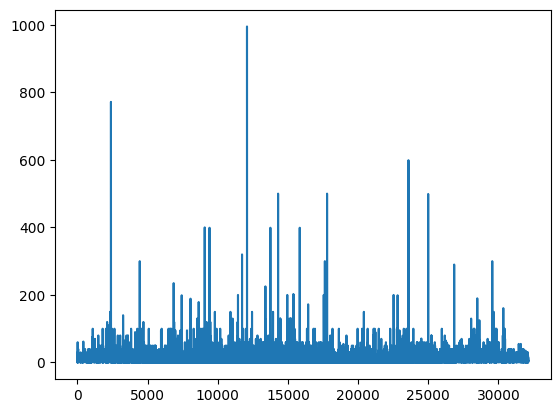

In [180]:
import matplotlib.pyplot as plt
dfSteamGames['price'] = dfSteamGames['price'].fillna(dfSteamGames['price'].median())
plt.plot(dfSteamGames['price'].values)

### Check `tags` and `genres` Columns

In [181]:
dfSteamGames[dfSteamGames['tags'].notna() & dfSteamGames['genres'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,1.79,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN,NaN
11,NaN,NaN,Icarus Six Sixty Six,NaN,http://store.steampowered.com/app/724910/Icaru...,NaN,['Casual'],http://steamcommunity.com/app/724910/reviews/?...,NaN,"['Single-player', 'HTC Vive', 'Tracked Motion ...",0.00,0.0,724910.0,NaN,NaN
19,NaN,NaN,After Life VR,NaN,http://store.steampowered.com/app/772590/After...,NaN,"['Early Access', 'Indie', 'VR']",http://steamcommunity.com/app/772590/reviews/?...,NaN,"['Single-player', 'HTC Vive', 'Tracked Motion ...",4.99,1.0,772590.0,NaN,NaN
20,NaN,NaN,Kitty Hawk,NaN,http://store.steampowered.com/app/640250/Kitty...,NaN,"['Early Access', 'Action', 'Adventure', 'Indie...",http://steamcommunity.com/app/640250/reviews/?...,1.97,"['Single-player', 'Steam Leaderboards', 'HTC V...",2.99,1.0,640250.0,NaN,NaN
22,NaN,NaN,Mortars VR,NaN,http://store.steampowered.com/app/711440/Morta...,NaN,"['Early Access', 'Strategy', 'Action', 'Indie'...",http://steamcommunity.com/app/711440/reviews/?...,0.89,"['Single-player', 'Multi-player', 'Online Mult...",0.99,1.0,711440.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32116,NaN,NaN,Robotpencil Presents: Exercise: Brushwork,Robotpencil Presents: Exercise: Brushwork,http://store.steampowered.com/app/775640/Robot...,2018-01-03,"['Design & Illustration', 'Tutorial']",http://steamcommunity.com/app/775640/reviews/?...,NaN,NaN,3.99,0.0,775640.0,NaN,NaN
32117,NaN,NaN,Robotpencil Presents: Creative Composition,Robotpencil Presents: Creative Composition,http://store.steampowered.com/app/777930/Robot...,2018-01-03,"['Design & Illustration', 'Tutorial']",http://steamcommunity.com/app/777930/reviews/?...,NaN,NaN,3.99,0.0,777930.0,NaN,NaN
32118,NaN,NaN,The Gamble House,The Gamble House,http://store.steampowered.com/app/775370/The_G...,2016-11-19,['Movie'],http://steamcommunity.com/app/775370/reviews/?...,NaN,['Captions available'],4.99,0.0,775370.0,NaN,NaN
32119,NaN,NaN,Kalen Chock Presents: 2017 Free Tutorial,Kalen Chock Presents: 2017 Free Tutorial,http://store.steampowered.com/app/777950/Kalen...,2018-01-03,"['Design & Illustration', 'Tutorial']",http://steamcommunity.com/app/777950/reviews/?...,NaN,NaN,0.00,0.0,777950.0,NaN,NaN


This 3144 entries can be updated in the `genres` column to have the value in the `tags` column

In [182]:
i = dfSteamGames[dfSteamGames['tags'].notna() & dfSteamGames['genres'].isna()]['tags'].index
v = dfSteamGames[dfSteamGames['tags'].notna() & dfSteamGames['genres'].isna()]['tags'].values

In [183]:
dfSteamGames.loc[i,'genres'] = v
dfSteamGames[dfSteamGames['tags'].notna() & dfSteamGames['genres'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer


In [184]:
dfSteamGames[dfSteamGames['genres'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer
357,Paradox Interactive,NaN,Europa Universalis III: Heir to the Throne,Europa Universalis III: Heir to the Throne,http://store.steampowered.com/app/25806/Europa...,2009-12-15,NaN,http://steamcommunity.com/app/25806/reviews/?b...,NaN,"['Single-player', 'Multi-player', 'Downloadabl...",9.99,0.0,25806.0,86.0,Paradox Interactive
468,DnS Development,NaN,Booster Trooper Demo,Booster Trooper Demo,http://store.steampowered.com/app/27930/Booste...,2010-08-31,NaN,http://steamcommunity.com/app/27930/reviews/?b...,NaN,['Game demo'],4.99,0.0,27930.0,NaN,DnS Development
611,"SEGA, Feral Interactive (Mac/Linux)",NaN,"Warhammer 40,000: Dawn of War II - Retribution...","Warhammer 40,000: Dawn of War II - Retribution...",http://store.steampowered.com/app/56436/Warham...,2011-02-28,NaN,http://steamcommunity.com/app/56436/reviews/?b...,NaN,['Downloadable Content'],0.99,0.0,56436.0,NaN,"Relic Entertainment,Feral Interactive (Mac/Linux)"
778,Trendy Entertainment,NaN,Dungeon Defenders Halloween Costume Pack,Dungeon Defenders Halloween Costume Pack,http://store.steampowered.com/app/202520/Dunge...,2011-11-11,NaN,http://steamcommunity.com/app/202520/reviews/?...,NaN,['Downloadable Content'],0.99,0.0,202520.0,NaN,Trendy Entertainment
779,NaN,NaN,Dungeon Defenders Capture the Flag Pre-Alpha P...,Dungeon Defenders Capture the Flag Pre-Alpha P...,http://store.steampowered.com/app/202523/Dunge...,2011-11-11,NaN,http://steamcommunity.com/app/202523/reviews/?...,NaN,['Downloadable Content'],4.99,0.0,202523.0,NaN,Trendy Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31179,"SEGA, Feral Interactive (Mac), Feral Interacti...",NaN,Total War: SHOGUN 2 - Sengoku Jidai Unit Pack,Total War: SHOGUN 2 - Sengoku Jidai Unit Pack,http://store.steampowered.com/app/34342/Total_...,2011-07-28,NaN,http://steamcommunity.com/app/34342/reviews/?b...,NaN,['Downloadable Content'],2.99,0.0,34342.0,NaN,"The Creative Assembly,Feral Interactive (Mac),..."
31260,Team17 Digital Ltd,NaN,"Worms Reloaded: The ""Pre-order Forts and Hats""...","Worms Reloaded: The ""Pre-order Forts and Hats""...",http://store.steampowered.com/app/22630/Worms_...,2011-05-17,NaN,http://steamcommunity.com/app/22630/reviews/?b...,NaN,['Downloadable Content'],1.99,0.0,22630.0,NaN,Team17 Digital Ltd
31271,"SEGA, Feral Interactive (Mac), Feral Interacti...",NaN,Total War: SHOGUN 2 - The Ikko Ikki Clan Pack,Total War: SHOGUN 2 - The Ikko Ikki Clan Pack,http://store.steampowered.com/app/34348/Total_...,2011-05-26,NaN,http://steamcommunity.com/app/34348/reviews/?b...,NaN,['Downloadable Content'],4.99,0.0,34348.0,NaN,"The Creative Assembly,Feral Interactive (Mac),..."
31322,Tripwire Interactive,NaN,"Killing Floor ""London's Finest"" Character Pack","Killing Floor ""London's Finest"" Character Pack",http://store.steampowered.com/app/35419/Killin...,2010-12-14,NaN,http://steamcommunity.com/app/35419/reviews/?b...,NaN,['Downloadable Content'],7.99,0.0,35419.0,NaN,Tripwire Interactive


We still have 138 entries without genre, this will not affect the project significatively.

### Check `release_date` columns

In [230]:
dfSteamGames['release_date'].unique()

array(['2018-01-04', '2017-07-24', '2017-12-07', ..., '2016-11-19',
       'January 2018', '2018-10-01'], dtype=object)

Note there are values that `to_datetime` cannot parse, lets look at all of them that are not nan.

In [245]:
notparsed = pd.to_datetime(dfSteamGames['release_date'],errors='coerce',format='mixed').isna()
(dfSteamGames['release_date'][notparsed][dfSteamGames['release_date'][notparsed].notna()]).unique()

array(['Soon..', 'Beta测试已开启', 'Coming Soon', 'Q2 2017', 'TBA',
       "When it's done", 'coming soon', 'Q2 2018', 'Winter 2017', 'soon',
       '14 July', 'Summer 2017', 'Spring 2018', 'Winter 2018',
       'To be Announced', 'TBD', 'Fall 2017', 'Q1 2018', 'Январь 2018',
       'Soon', 'First quarter of 2018', 'H2 2018', '2018年初頭発売予定',
       'Please wait warmly', 'early access', 'SOON',
       'Coming Soon/Próximamente', '2018 [Now get free Pre Alpha]',
       '1st Quarter 2018', '预热群52756441', '2018年1月', 'Coming soon',
       'Fall 2018',
       '0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵',
       '"""Soon"""', 'Spring 2017', 'Demo coming soon.', 'Coming 2017',
       'Not yet available',
       "C'est bientôt...                    (ou pas)", 'Q4 2017',
       'Early 2018', 'Datachunks conflicted. Be vigiliant.',
       'Q2 2018 (Tentative)', 'Demo is available now!',
       'Play Beta in demo!', '2017 Q4', 'Coming Soon!',
       'Early

All that do not contain year, replace by nan. All that contain year, replace by the year.

In [256]:
import numpy as np
dfSteamGames['release_date'].replace(['Soon..', 'Coming Soon','Beta测试已开启', 'TBA',"When it's done", '14 July', 'coming soon', 'soon','To be Announced', 'TBD','Soon','Please wait warmly','early access', 'SOON','Coming Soon/Próximamente','预热群52756441', 'Coming soon','0̵1̴0̵0̶1̷0̶0̵0̴ ̴0̶0̶1̶1̶0̷0̶1̵1̴ ̸0̶0̶1̶1̵0̶1̷0̴0̵ ̴0̶1̷0̸1̵0̷0̴1̶0̴ ̴0̷0̴1̷1̶0̶1̵1̷1̵ ̵','"""Soon"""', 'Demo coming soon.','Not yet available',"C'est bientôt...                    (ou pas)", 'Datachunks conflicted. Be vigiliant.', 'Demo is available now!','Play Beta in demo!', 'Coming Soon!', 'To be announced','When it is finished', 'Release Date TBA','When it is ready', 'Early Access Starting Soon!', 'Comming Soon','Early Access soon', 'To Be Announced','Coming soon..','Soon™',"When it's done!", 'SOON™'],np.nan,inplace=True)
dfSteamGames['release_date'].replace(['Q2 2017', 'Winter 2017', 'Summer 2017','Fall 2017', 'Spring 2017', 'Coming 2017', 'Q4 2017', '2017 Q4', 'TBA 2017','Coming Q3 2017', 'Early 2017', 'End 2017','2017 Q1', 'Q1 2017', "When it's done (2017)", 'Q1 (ish), 2017','Late 2016 - Early 2017', 'Coming Fall 2017', 'Coming late 2017','Hitting Early Access in 2017'],'2017-07-01',inplace=True)
dfSteamGames['release_date'].replace(['Q2 2018', 'Spring 2018', 'Winter 2018', 'Q1 2018', 'Январь 2018','First quarter of 2018', 'H2 2018', '2018年初頭発売予定','2018 [Now get free Pre Alpha]', '1st Quarter 2018', '2018年1月','Fall 2018', 'Early 2018', 'Q2 2018 (Tentative)','Early Spring 2018', 'Coming Q1 2018', '2018 early', 'Q1, 2018'],'2018-07-01',inplace=True)

In [262]:
notparsed = pd.to_datetime(dfSteamGames['release_date'],errors='coerce',format='mixed').isna()
(dfSteamGames['release_date'][notparsed][dfSteamGames['release_date'][notparsed].notna()]).unique()

array([], dtype=object)

Parse again, fill nan with median date and replace in `release_date` column.

In [266]:
parsed = pd.to_datetime(dfSteamGames['release_date'],errors='coerce',format='mixed')
dfSteamGames['release_date']= parsed.fillna(parsed.median())

### Drop unnecesary columns

In [267]:
dfSteamGames.drop(columns=['publisher','title','url','tags','reviews_url','discount_price','specs','early_access','metascore'],inplace=True)
dfSteamGames

,genres,app_name,release_date,price,id,developer
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,0.00,643980.0,Secret Level SRL
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,0.00,670290.0,Poolians.com
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
4,"['Action', 'Indie', 'Casual', 'Sports']",Log Challenge,2016-04-21,2.99,773570.0,NaN
...,...,...,...,...,...,...
32128,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS"""
32129,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada
32130,"['Indie', 'Racing', 'Simulation']",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich
32131,"['Casual', 'Indie']",EXIT 2 - Directions,2017-09-02,4.99,658870.0,"xropi,stev3ns"


Check information of dataframe after all transformations

In [268]:
dfSteamGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        31995 non-null  object        
 1   app_name      32133 non-null  object        
 2   release_date  32133 non-null  datetime64[ns]
 3   price         32133 non-null  float64       
 4   id            32132 non-null  float64       
 5   developer     28901 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.5+ MB


In [270]:
dfSteamGames.to_csv('TransformedData/df_steamGames.csv',index=False)

In conclusion, Steam Games Dataframe was almost succesfully transformated and imputed. Summarizing columns:

- `genres`: has 138 null entries, this will not significatively affect the project.
- `app_name`, `release_date`, `price`: complete.
- `id`: has 1 null entry, thid will not significatively affect the project.
- `developer`: has 3233, this can affect the project as it is almost 10% of the data, will try to imputate later.

The rest of the columns are not needed.